In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy

In [2]:
#import AA from parent directory
from torchAA import torchAA
from helpers.callbacks import EarlyStop

In [5]:
mat = scipy.io.loadmat('NMR_mix_DoE.mat')


# Get X and Labels. Probably different for the other dataset, but i didn't check :)
X = mat.get('xData')
targets = mat.get('yData')
target_labels = mat.get('yLabels')
axis = mat.get("Axis")

In [6]:
targets
X

array([[ 4.03247070e+00, -2.82177734e+00, -8.99389648e+00, ...,
        -1.47810059e+01, -1.08269043e+01, -7.94067383e+00],
       [ 2.04589844e-01,  4.29199219e-01,  2.56347656e-02, ...,
        -1.49082031e+01, -1.79223633e+01, -2.20202637e+01],
       [-9.61425781e-01, -6.82958984e+00, -1.07421875e+01, ...,
        -9.44091797e-01, -1.75903320e+00, -3.44335938e+00],
       ...,
       [ 8.46153000e+01,  8.78576000e+01,  8.88745000e+01, ...,
         3.73382000e+01,  3.33841000e+01,  2.91643000e+01],
       [ 3.64296000e+01,  3.98378000e+01,  4.36526000e+01, ...,
         4.18780000e+00,  5.04840000e+00,  6.55640000e+00],
       [-1.29449000e+01, -1.17738000e+01, -9.92300000e+00, ...,
        -9.02650000e+00, -1.08731000e+01, -1.41708000e+01]])

In [8]:
df = pd.read_csv("iris.csv")
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [9]:
#make a dataframe with only the first 2 and last column
df = df.iloc[:, [0,1,4]]

In [10]:
# PC = PCA(n_components=2)
X = df.iloc[:,0:2].values
# remove the first column
# X = X[:,1:3]
# append the labels to the data
X_plot = np.append(X, df.iloc[:,2:3], axis=1)

In [11]:
X.T.shape

(2, 149)

In [19]:
#plot the data
#map the labels to colors
colors = {"Iris-setosa": "red", "Iris-versicolor": "blue", "Iris-virginica": "green"}
# plt.scatter(X_plot[:,0], X_plot[:,1], c=[colors[label] for label in X_plot[:,2]])
# plt.show()

In [13]:
#train the model
import torch
AA = torchAA(X, 3)

In [14]:
C, S = AA.fit(verbose=True, stopper=EarlyStop(patience=10, offset=-1e-5))

In [16]:
print(C.shape)
print(S.shape)
print(X.shape)

(3, 149)
(149, 3)
(149, 2)


In [17]:
A = np.matmul(C, X)
rec = np.matmul(S, A)

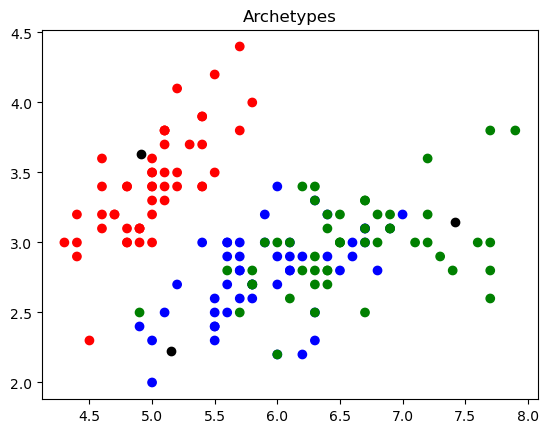

In [21]:
#plot the archetypes
plt.figure()

#matmul the archetypes with the data to get the reconstructed data
# A = np.matmul(C, X)
# recons = np.matmul(S, A)


plt.scatter(X[:,0], X[:,1], c=[colors[label] for label in X_plot[:,2]])


for vec in A:
    plt.scatter(vec[0], vec[1], c="black")

plt.title("Archetypes")
plt.show()